In [780]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

%matplotlib inline

<h1>Data Import</h1>

In [782]:
client_profiles_df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_demo.txt")
client_profiles_df


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [783]:
df_web_data_1 = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_1.txt")
df_web_data_1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [784]:
df_web_data_1.groupby(["client_id","visit_id","process_step"]).agg({"process_step":"count"}).head(40)

process_step
client_id visit_id                     process_step              
169       749567106_99161211863_557568 confirm                  1
                                       start                    1
                                       step_1                   1
                                       step_2                   1
                                       step_3                   1
555       637149525_38041617439_716659 confirm                  1
                                       start                    1
                                       step_1                   1
                                       step_2                   1
                                       step_3                   1
647       40369564_40101682850_311847  confirm                  1
                                       start                    1
                                       step_1                   1
                                       step_2                   1
                                       step_3                   1
722       984487154_55831795985_521110 confirm                  1
                                       start                    2
                                       step_1                   3
                                       step_2                   2
                                       step_3                   1
934       7076463_57954418406_971348   start                    4
1028      557292053_87239438319_391157 start                    1
                                       step_1                   5
                                       step_2                   2
                                       step_3                   1
1186      507052512_11309370126_442139 start                    1
          795373564_99931517312_810896 start                    1
                                       step_1                   1
                                       step_2                   1
1195      393817425_39015278493_996341 confirm                  1
                                       start                    1
                                       step_1                   1
                                       step_2                   1
                                       step_3                   1
1197      71862471_21202285428_848395  confirm                  1
                                       start                    1
                                       step_1                   1
                                       step_2                   2
                                       step_3                   2
1368      784065271_45379483290_309335 start                    1

In [785]:
df_web_data_2 = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_2.txt")
df_web_data_2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [786]:
df_web_data_merged = pd.concat([df_web_data_1, df_web_data_2], axis=0)
df_web_data_merged

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [787]:
df_final_experiment_clients =pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_experiment_clients.txt")
df_final_experiment_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


<h1>Data Cleaning</h1>

In [789]:
client_profiles_df.shape

(70609, 9)

In [790]:
client_profiles_df.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [791]:
client_profiles_df["gendr"].value_counts()

gendr
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64

In [792]:
client_profiles_df["num_accts"].value_counts()

num_accts
2.0    55497
3.0    12529
4.0     2241
5.0      284
6.0       33
7.0        8
1.0        2
8.0        1
Name: count, dtype: int64

In [793]:
client_profiles_df["calls_6_mnth"].value_counts()

calls_6_mnth
6.0    14112
1.0    11016
2.0    10252
3.0     8752
0.0     7732
4.0     7175
5.0     6627
7.0     4929
Name: count, dtype: int64

In [794]:
client_profiles_df.isnull().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [795]:
# dropping rows with null values

df_client_profiles = client_profiles_df.dropna(axis=0, how="any")

In [796]:
# Cleaning the age column, to only contain integers, to reduce the amount of ages represented
df_client_profiles['clnt_age'] = np.floor(df_client_profiles['clnt_age']).astype(int)

/var/folders/gk/c2gpqh3x7z74jf883m6p8r3c0000gn/T/ipykernel_874/2524163931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_client_profiles['clnt_age'] = np.floor(df_client_profiles['clnt_age']).astype(int)


In [797]:
# summarizing the gender column 

df_client_profiles["gendr"] = df_client_profiles["gendr"].replace("X", "U")
df_client_profiles

/var/folders/gk/c2gpqh3x7z74jf883m6p8r3c0000gn/T/ipykernel_874/1879273022.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_client_profiles["gendr"] = df_client_profiles["gendr"].replace("X", "U")


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68,M,3.0,475114.69,4.0,4.0


/var/folders/gk/c2gpqh3x7z74jf883m6p8r3c0000gn/T/ipykernel_874/3276336683.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_client_profiles, x='num_accts', palette="Set3")


<Axes: xlabel='num_accts', ylabel='count'>

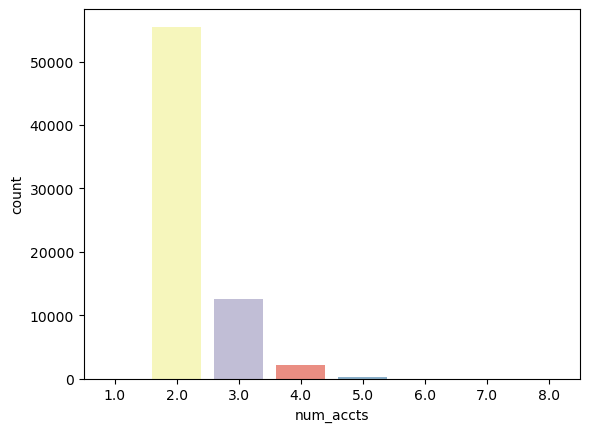

In [798]:
sns.countplot(data=df_client_profiles, x='num_accts', palette="Set3")

In [799]:
df_client_profiles.describe().round(2)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,70594.00,70594.00,70594.00,70594.00,70594.00,70594.00,70594.00,70594.00
mean,5005025.75,12.05,150.66,46.18,2.26,147446.73,3.38,5.57
std,2877289.31,6.87,82.09,15.60,0.53,301510.58,2.24,2.35
min,169.00,2.00,33.00,13.00,1.00,13789.42,0.00,1.00
25%,2519542.75,6.00,82.00,32.00,2.00,37346.60,1.00,4.00
50%,5016973.50,11.00,136.00,47.00,2.00,63334.59,3.00,5.00
75%,7483074.25,16.00,192.00,59.00,2.00,137546.12,6.00,7.00
max,9999839.00,62.00,749.00,96.00,8.00,16320040.15,7.00,9.00


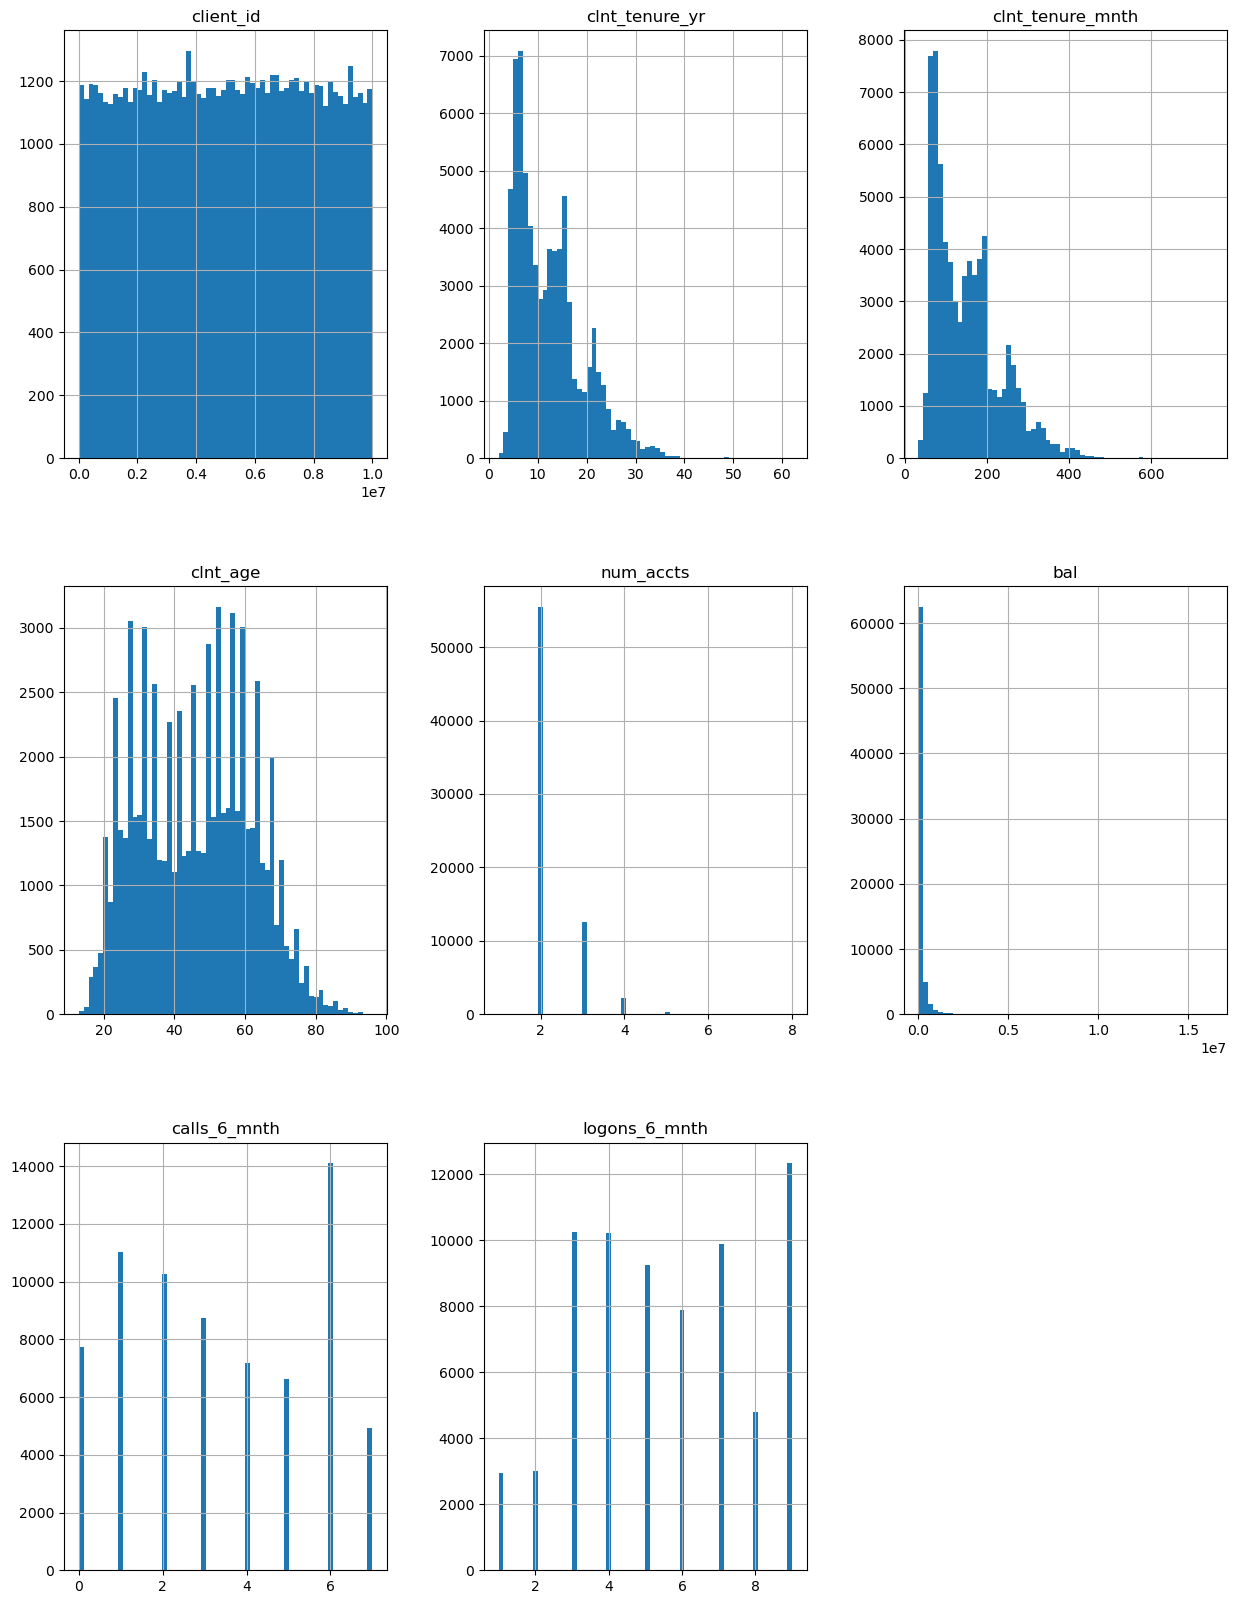

In [800]:
df_client_profiles.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

In [1662]:
# Merging Df Demographics with DF Variations

df_client_test_merged = df_client_profiles.merge(df_final_experiment_clients, how="inner", on = "client_id")
df_client_test_merged

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70589,7993686,4.0,56.0,38,U,3.0,1411062.68,5.0,5.0,NaN
70590,8981690,12.0,148.0,31,M,2.0,101867.07,6.0,6.0,NaN
70591,333913,16.0,198.0,61,F,2.0,40745.00,3.0,3.0,NaN
70592,1573142,21.0,255.0,68,M,3.0,475114.69,4.0,4.0,NaN


In [802]:
df_clients_test = df_client_test_merged[df_client_test_merged["Variation"] == "Test"].reset_index(drop=True)
df_clients_test

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60,U,2.0,45105.30,6.0,9.0,Test
1,1439522,5.0,64.0,32,U,2.0,52467.79,6.0,9.0,Test
2,1562045,16.0,198.0,49,M,2.0,67454.65,3.0,6.0,Test
3,388801,30.0,361.0,57,M,5.0,522498.72,1.0,4.0,Test
4,8198645,15.0,189.0,54,F,2.0,382303.83,6.0,9.0,Test
...,...,...,...,...,...,...,...,...,...,...
26956,501496,23.0,281.0,35,F,2.0,32529.34,0.0,3.0,Test
26957,1780858,21.0,262.0,68,M,3.0,372100.59,6.0,9.0,Test
26958,5826160,20.0,249.0,56,F,2.0,44837.16,2.0,5.0,Test
26959,8739285,19.0,229.0,69,F,2.0,44994.24,1.0,4.0,Test


In [1628]:
df_clients_test.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,2.696100e+04,26961.000000,26961.000000,26961.000000,26961.000000,2.696100e+04,26961.000000,26961.000000
mean,4.999639e+06,11.982901,149.852899,46.885242,2.249917,1.489626e+05,3.061941,6.101851
std,2.877510e+06,6.844947,81.783390,15.524749,0.529335,3.073737e+05,2.190590,2.177119
min,5.550000e+02,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000
25%,2.516570e+06,6.000000,82.000000,33.000000,2.000000,3.972920e+04,1.000000,4.000000
50%,5.025928e+06,11.000000,134.000000,47.000000,2.000000,6.546836e+04,3.000000,6.000000
75%,7.470213e+06,15.000000,191.000000,59.000000,2.000000,1.394786e+05,5.000000,8.000000
max,9.999832e+06,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000


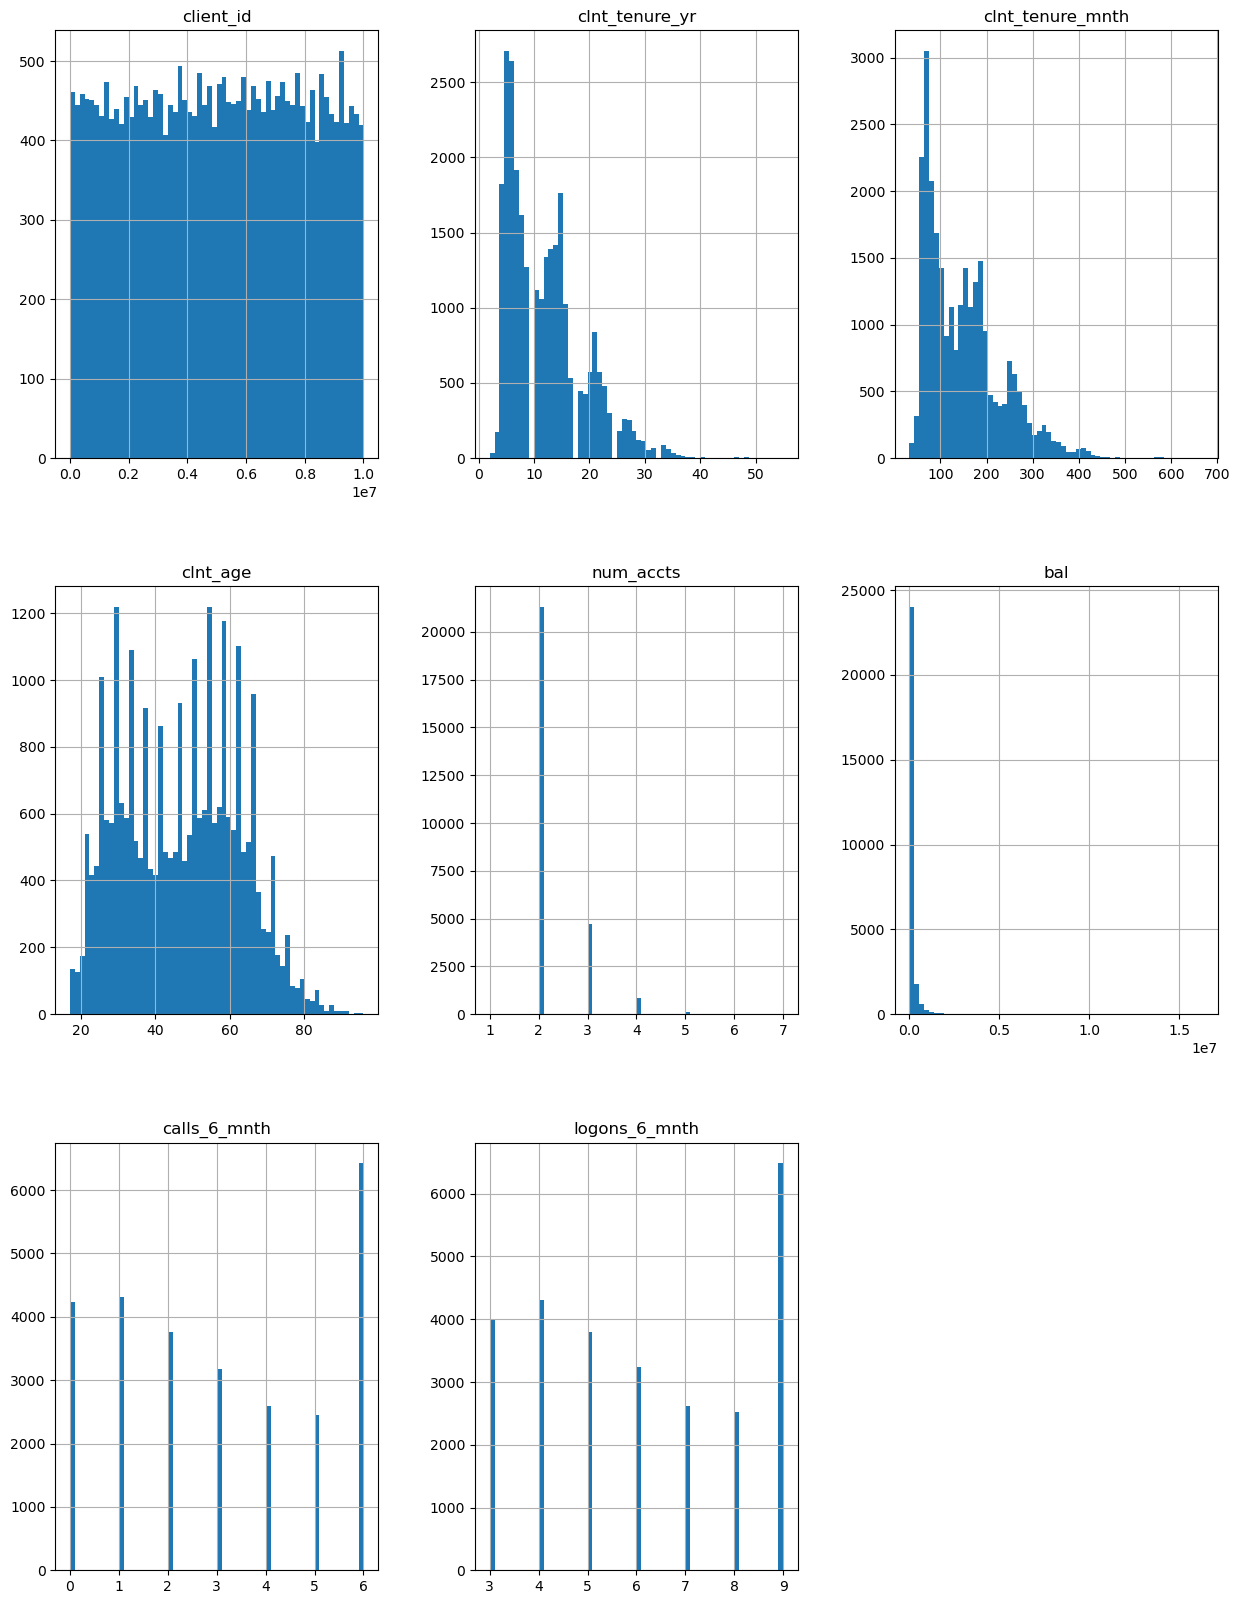

In [804]:
df_clients_test.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

In [805]:
df_clients_control = df_client_test_merged[df_client_test_merged["Variation"] == "Control"].reset_index(drop=True)
df_clients_control

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,2304905,7.0,94.0,58,U,2.0,110860.30,6.0,9.0,Control
1,5126305,12.0,145.0,33,F,2.0,103671.75,0.0,3.0,Control
2,3727881,5.0,71.0,30,U,2.0,23915.60,0.0,3.0,Control
3,272934,5.0,66.0,58,U,2.0,27021.42,2.0,5.0,Control
4,285619,30.0,369.0,67,M,2.0,299388.72,3.0,6.0,Control
...,...,...,...,...,...,...,...,...,...,...
23521,6662941,7.0,84.0,36,F,2.0,83101.84,4.0,7.0,Control
23522,2787512,23.0,283.0,48,F,3.0,123618.60,1.0,4.0,Control
23523,9932367,23.0,280.0,57,F,2.0,94466.55,6.0,9.0,Control
23524,4079649,23.0,276.0,62,M,3.0,57575.28,4.0,7.0,Control


In [806]:
df_clients_control.describe().round(2)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,23526.00,23526.00,23526.00,23526.00,23526.00,23526.00,23526.00,23526.00
mean,5013676.13,12.09,151.06,47.26,2.26,150151.90,3.13,6.17
std,2877413.56,6.88,82.13,15.53,0.54,295812.41,2.18,2.17
min,1028.00,2.00,33.00,17.00,2.00,23789.61,0.00,3.00
25%,2515177.00,6.00,82.00,33.00,2.00,40122.95,1.00,4.00
50%,5023832.50,11.00,137.00,48.00,2.00,66031.45,3.00,6.00
75%,7483638.50,16.00,192.00,60.00,2.00,140615.63,5.00,8.00
max,9998921.00,55.00,669.00,96.00,7.00,8292996.21,6.00,9.00


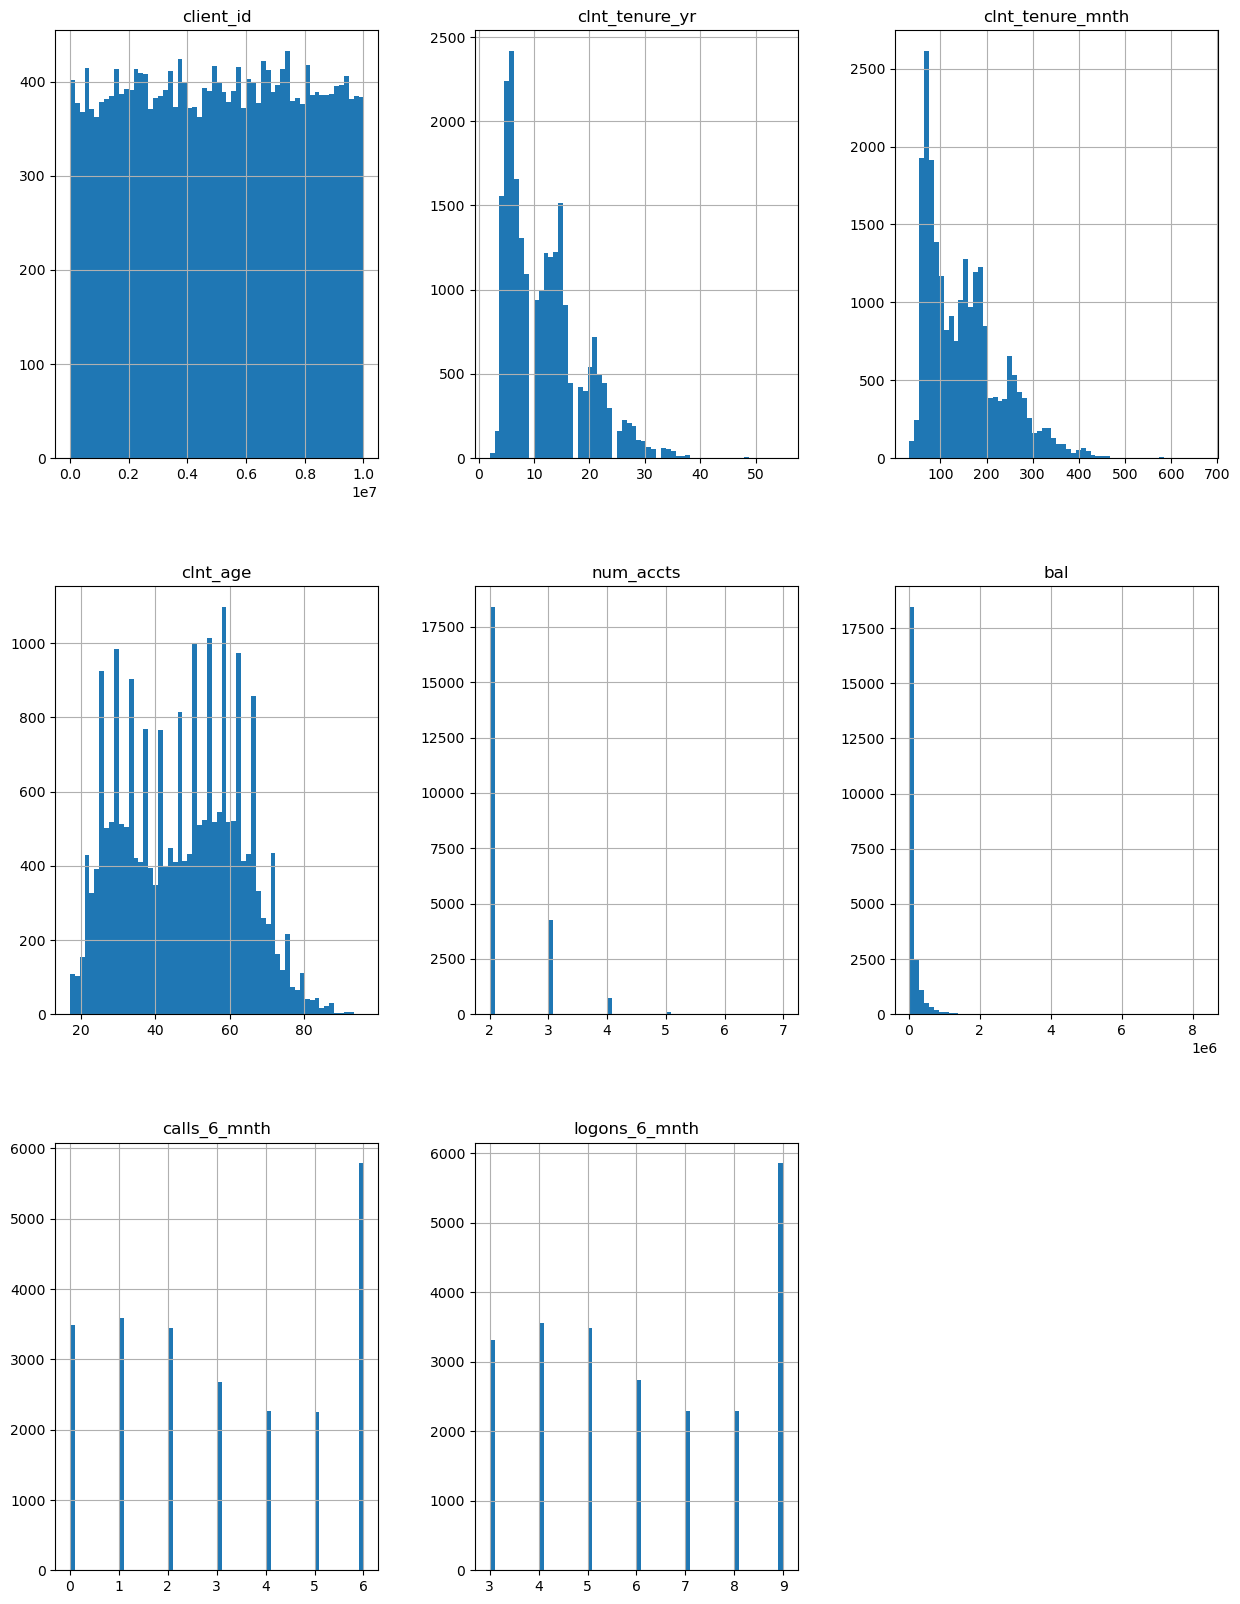

In [807]:
df_clients_control.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

In [808]:
df_clients_no_test = df_client_test_merged[df_client_test_merged["Variation"].isnull()== True].reset_index(drop=True)
df_clients_no_test

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,414870,6.0,80.0,57,U,2.0,492304.33,5.0,5.0,NaN
1,1047811,9.0,118.0,30,M,2.0,27085.88,5.0,5.0,NaN
2,6090170,5.0,62.0,28,U,2.0,39855.30,4.0,4.0,NaN
3,706631,16.0,193.0,56,U,2.0,52298.64,5.0,5.0,NaN
4,6844077,16.0,196.0,48,F,2.0,518763.48,7.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...
20102,7993686,4.0,56.0,38,U,3.0,1411062.68,5.0,5.0,NaN
20103,8981690,12.0,148.0,31,M,2.0,101867.07,6.0,6.0,NaN
20104,333913,16.0,198.0,61,F,2.0,40745.00,3.0,3.0,NaN
20105,1573142,21.0,255.0,68,M,3.0,475114.69,4.0,4.0,NaN


In [809]:
df_clients_no_test.describe().round(2)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,20107.00,20107.00,20107.00,20107.00,20107.00,20107.00,20107.00,20107.00
mean,5002128.07,12.11,151.27,43.98,2.26,142248.96,4.11,4.15
std,2876968.03,6.90,82.45,15.56,0.54,300124.15,2.19,2.18
min,169.00,2.00,33.00,13.00,1.00,13789.42,1.00,1.00
25%,2532094.50,6.00,82.00,30.00,2.00,30147.72,2.00,2.00
50%,4998573.00,11.00,138.00,45.00,2.00,56338.10,4.00,4.00
75%,7493638.50,16.00,193.00,56.00,2.00,130512.66,6.00,6.00
max,9999839.00,62.00,749.00,92.00,8.00,12838418.01,7.00,7.00


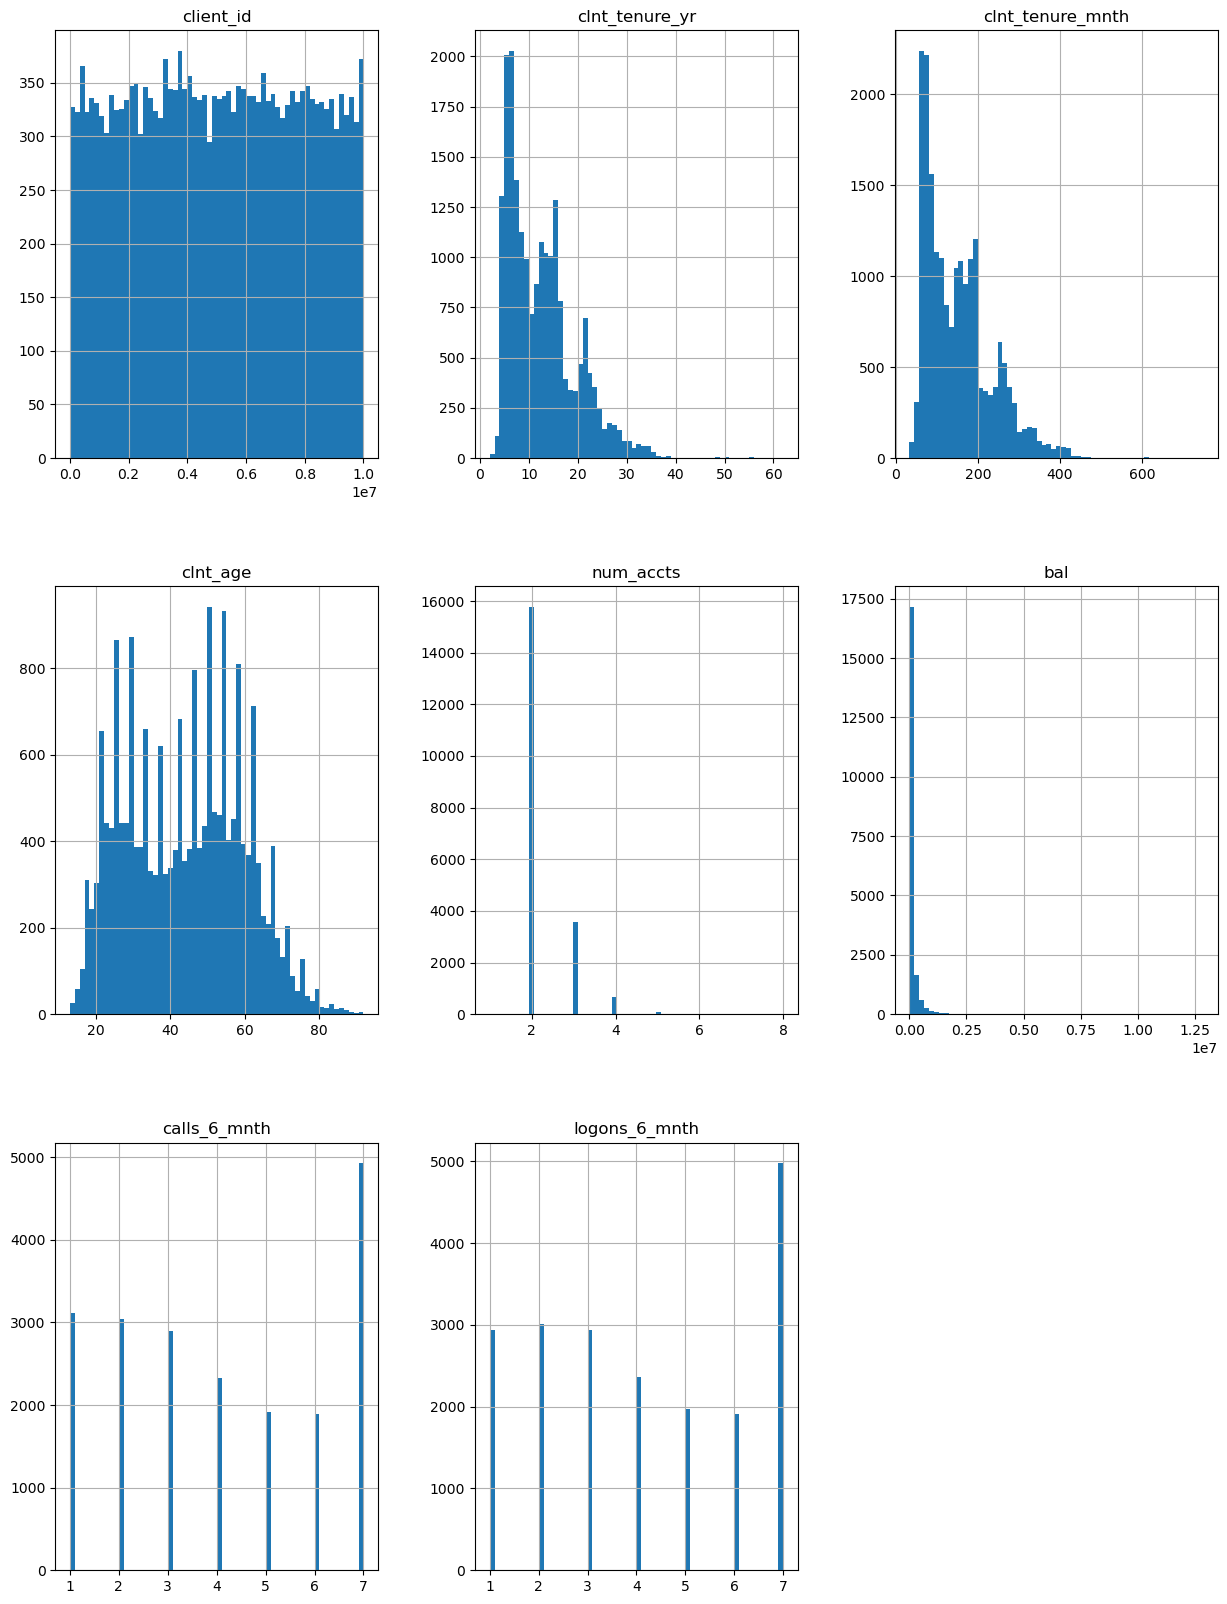

In [810]:
df_clients_no_test.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

In [811]:
# After observation, No null value or cleaning had to be done on 'df_web_data_merged'
df_web_data_merged.isnull().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

# Student Portal Guideline Q&A (Day 1-2)

### Who are the primary clients using this online process?


In [814]:
client_profiles_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [815]:
client_profiles_df["gendr"].value_counts()

gendr
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64

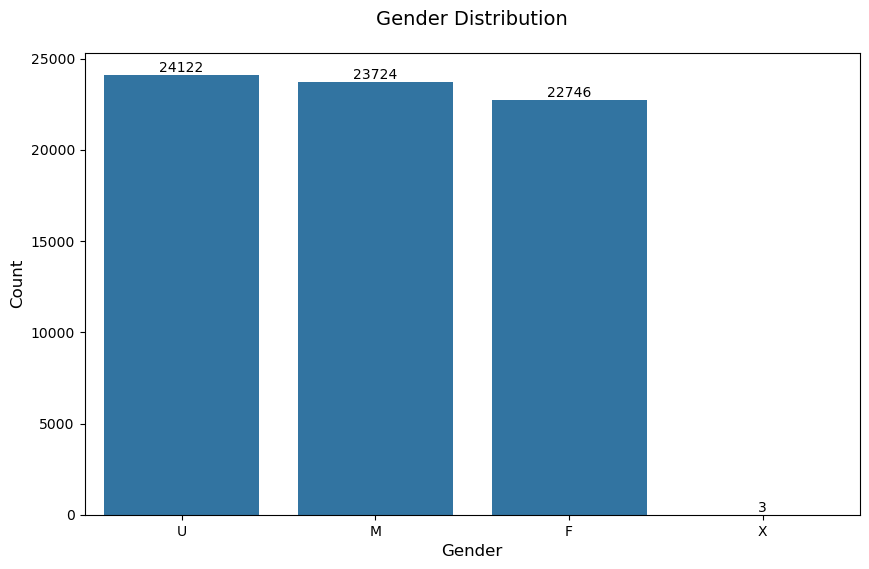

In [816]:
total = client_profiles_df['gendr'].value_counts().sum()

# Calculate percentages
percentages = (client_profiles_df['gendr'].value_counts() / total * 100).round(2)

# See both counts and percentages in one DataFrame:
summary = pd.DataFrame({
    'count': client_profiles_df['gendr'].value_counts(),
    'percentage': percentages
})

# Visualization with plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=client_profiles_df['gendr'].value_counts().index,
    y=client_profiles_df['gendr'].value_counts().values
)

# Customize the plot
plt.title('Gender Distribution', fontsize=14, pad=20)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add value labels on top of each bar
for i, v in enumerate(client_profiles_df['gendr'].value_counts().values):
    plt.text(i, v, str(v), ha='center', va='bottom')


### Are the primary clients younger or older? 

In [818]:
#The clients average age is 45 years old.
#The most represented age is 51 years old.

# if age > 40 = 'young'
# if age < 40 = 'old'
# then our primary clients are, in average, old.

In [819]:
#Age Calucaltion

In [820]:
df_clients_no_test['clnt_age'].mean()

43.975779579251004

In [821]:
df_clients_test['clnt_age'].mean()

46.88524164533956

In [822]:
df_clients_control['clnt_age'].mean()

47.25694975771487

In [823]:
df_clients_no_test['clnt_age'].median()

45.0

In [824]:
df_clients_no_test['clnt_age'].mode()

0    51
Name: clnt_age, dtype: int64

### Are the primary clients new or long-standing? 

In [826]:
#The clients average standing is 151 months (aka 12 years and 7 months) in terms of mean.
#The clients average standing is 138 months (aka 11 years and 6 months) in terms of median.
#The most represented standing is, on the other hand, only 58 months (4 years and 10 months) which may indicate an uneven distribution

# if new-standing > 60 months (aka 5 years)
# if long-stamding < 60 months (aka 5 years)
# them our primary clients are, in average, long-standing.

In [827]:
#Standing Calucaltion

In [828]:
df_clients_no_test['clnt_tenure_mnth'].mean()

151.2717461580544

In [829]:
df_clients_test['clnt_tenure_mnth'].mean()

149.8528986313564

In [830]:
df_clients_control['clnt_tenure_mnth'].mean()

151.06210150471819

In [831]:
df_clients_no_test['clnt_tenure_mnth'].median()

138.0

In [832]:
df_clients_no_test['clnt_tenure_mnth'].mode()

0    58.0
Name: clnt_tenure_mnth, dtype: float64

# KPIs | Performance metrics (Day 3)

In [1318]:
df_test = df_clients_test.merge(df_web_data_merged,how="inner", on="client_id")

In [1053]:
df_control = df_clients_control.merge(df_web_data_merged,how="inner", on="client_id")

In [1320]:
df_web_data_merged[df_web_data_merged["process_step"] == "confirm"]

df_confirm = df_web_data_merged[df_web_data_merged["process_step"] == "confirm"].groupby("client_id").agg({"process_step":"count"})

In [839]:
# Completion Rate of customers observed (in %)
df_confirm.shape[0]/df_web_data_merged.groupby("client_id").agg({"process_step":"count"}).shape[0]*100

67.53247834083741

In [840]:
# Test completion rate for test group

df_test[df_test["process_step"] == "confirm"]

df_test_confirm = df_test[df_test["process_step"] == "confirm"].groupby("client_id").agg({"process_step":"count"})
df_test_confirm.shape[0]

18682

In [841]:
# Completion Rate of test customers observed (in %)
round(df_test_confirm.shape[0]/df_test.groupby("client_id").agg({"process_step":"count"}).shape[0]*100, 2)

69.29

In [842]:
# Test completion rate for control group

df_control[df_control["process_step"] == "confirm"]

df_control_confirm = df_control[df_control["process_step"] == "confirm"].groupby("client_id").agg({"process_step":"count"})
df_control_confirm.shape[0]

15428

In [843]:
# Completion Rate of control customers observed (in %)
round(df_control_confirm.shape[0]/df_control.groupby("client_id").agg({"process_step":"count"}).shape[0]*100,2)

65.58

### Calculation of an alternaitve Confirmation rate based on confirmed page visits per over all visit_ids per customer

In [1345]:
df_merged_t_c = pd.concat([df_test, df_control], ignore_index=True)
df_merged_t_c = df_merged_t_c.groupby(["client_id", "clnt_tenure_yr", "clnt_tenure_mnth",
                       "clnt_age", "gendr", "num_accts", "bal", "calls_6_mnth", "logons_6_mnth", "Variation", "process_step"]).agg({"visit_id": "count"}).reset_index()
df_merged_t_c_confirmed = df_merged_t_c[df_merged_t_c["process_step"] == "confirm"]
df_merged_t_c_confirmed.rename(columns={"visit_id": "visited_confirmed"}, inplace=True)
df_merged_t_c_confirmed = df_merged_t_c_confirmed.drop(columns="process_step")
df_merged_t_c_confirmed

/var/folders/gk/c2gpqh3x7z74jf883m6p8r3c0000gn/T/ipykernel_874/3565810981.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_t_c_confirmed.rename(columns={"visit_id": "visited_confirmed"}, inplace=True)


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visited_confirmed
0,555,3.0,46.0,29,U,2.0,25454.66,2.0,6.0,Test,1
5,647,12.0,151.0,57,M,2.0,30525.80,0.0,4.0,Test,1
19,1195,21.0,262.0,54,M,2.0,28457.96,2.0,5.0,Control,1
24,1197,7.0,85.0,28,U,5.0,177062.14,5.0,8.0,Control,1
29,1336,48.0,576.0,42,M,4.0,130537.18,6.0,9.0,Test,3
...,...,...,...,...,...,...,...,...,...,...,...
207735,9998851,4.0,58.0,23,U,2.0,38473.54,3.0,6.0,Test,1
207741,9998964,5.0,71.0,45,U,3.0,91766.49,6.0,9.0,Test,1
207746,9999009,18.0,216.0,68,M,3.0,2055381.29,6.0,9.0,Test,1
207753,9999400,7.0,86.0,28,U,2.0,51787.04,0.0,3.0,Test,1


In [1347]:
df_all_visits = df_merged_t_c.groupby(["client_id", "clnt_tenure_yr", "clnt_tenure_mnth",
                       "clnt_age", "gendr", "num_accts", "bal", "calls_6_mnth", "logons_6_mnth", "Variation"]).agg({"visit_id": "count"}).reset_index()

In [1357]:
# Count the number of distinct visit_ids for each client_id
distinct_visit_counts = df_web_data_merged.groupby('client_id')['visit_id'].nunique().reset_index()

# Rename the column for clarity
distinct_visit_counts.columns = ['client_id', 'distinct_visit_count']

In [1361]:
combined_df = pd.merge(
    df_all_visits,                                      # The main DataFrame (left)
    df_merged_t_c_confirmed[['client_id', 'visited_confirmed']],  # The 'confirmed per visit' column to add
    on='client_id',                                 # Merging based on the 'client_id' column
    how='left'                                      # Keep all rows from df_visits (left DataFrame)
)
combined_df["visited_confirmed"].fillna(0, inplace=True)

combined_df = pd.merge(
    combined_df,                                      # The main DataFrame (left)
    distinct_visit_counts[['client_id', 'distinct_visit_count']],  # The 'confirmed per visit' column to add
    on='client_id',                                 # Merging based on the 'client_id' column
    how='left'                                      # Keep all rows from df_visits (left DataFrame)
)

combined_df.drop(columns="visit_id", inplace=True)
combined_df


/var/folders/gk/c2gpqh3x7z74jf883m6p8r3c0000gn/T/ipykernel_874/806038555.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df["visited_confirmed"].fillna(0, inplace=True)


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visited_confirmed,distinct_visit_count
0,555,3.0,46.0,29,U,2.0,25454.66,2.0,6.0,Test,1.0,1
1,647,12.0,151.0,57,M,2.0,30525.80,0.0,4.0,Test,1.0,1
2,934,9.0,109.0,51,F,2.0,32522.88,0.0,3.0,Test,0.0,1
3,1028,12.0,145.0,36,M,3.0,103520.22,1.0,4.0,Control,0.0,1
4,1104,5.0,66.0,48,U,3.0,154643.94,6.0,9.0,Control,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
50482,9999150,5.0,66.0,30,U,3.0,97141.71,6.0,9.0,Test,0.0,1
50483,9999400,7.0,86.0,28,U,2.0,51787.04,0.0,3.0,Test,1.0,1
50484,9999626,9.0,113.0,35,M,2.0,36642.88,6.0,9.0,Test,0.0,1
50485,9999729,10.0,124.0,31,F,3.0,107059.74,6.0,9.0,Test,1.0,3


In [1363]:
combined_df["confirmation_per_visit"] = round(combined_df["visited_confirmed"]/combined_df["distinct_visit_count"],2)
combined_df["confirmation_per_visit"].mean()

0.6689860756234279

## Time Spent on Each Step: The average duration users spend on each step.

In [845]:
#--------------------Code Overview------------------#
# This code calculates the time spent at each process step for clients in both test and control groups:
# 1. Converts 'date_time' to datetime for accurate time calculations.
# 2. Sorts data by 'visit_id' and 'date_time'.
# 3. Calculates time differences between steps for each visit.
# 4. Aggregates step durations (mean, median, and count) per 'process_step'.
# 5. Converts durations to readable minutes format.
# 6. Displays results for all clients, test, and control groups.
#---------------------------------------------------#

In [1690]:
# Deleting process steps that repeat multiple times, keeping only the first one for the same visit_id. 

df_web_data_cleaned = df_web_data_merged[
    (df_web_data_merged['process_step'].shift() != df_web_data_merged['process_step']) | 
    (df_web_data_merged['visit_id'].shift() != df_web_data_merged['visit_id'])
]

df_web_data_cleaned = df_web_data_cleaned.merge(df_final_experiment_clients, on="client_id", how="left")
df_web_data_cleaned = df_web_data_cleaned.dropna(how="any")
df_web_data_cleaned


,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
566759,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
566799,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
566800,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
566801,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


In [2028]:
## Testing completion time for whole group

#  Sort the data by visit_id and date_time
df_duration = df_web_data_cleaned.sort_values(['visit_id', 'date_time'], ascending=False)

#  Calculate time difference between steps for each visit
df_duration['duration'] = df_duration.groupby('visit_id')['date_time'].diff()
df_duration = df_duration.groupby(["client_id", "Variation", "visitor_id", 'visit_id', "process_step"])["duration"].sum().reset_index()

df_duration["duration"] = df_duration["duration"].dt.total_seconds().abs()

df_duration

,client_id,Variation,visitor_id,visit_id,process_step,duration
0,555,Test,402506806_56087378777,637149525_38041617439_716659,confirm,0.0
1,555,Test,402506806_56087378777,637149525_38041617439_716659,start,7.0
2,555,Test,402506806_56087378777,637149525_38041617439_716659,step_1,32.0
3,555,Test,402506806_56087378777,637149525_38041617439_716659,step_2,99.0
4,555,Test,402506806_56087378777,637149525_38041617439_716659,step_3,20.0
...,...,...,...,...,...,...
239326,9999729,Test,843385170_36953471821,493310979_9209676464_421146,start,82.0
239327,9999729,Test,843385170_36953471821,493310979_9209676464_421146,step_1,287.0
239328,9999729,Test,843385170_36953471821,493310979_9209676464_421146,step_2,81.0
239329,9999832,Test,145538019_54444341400,472154369_16714624241_585315,start,8.0


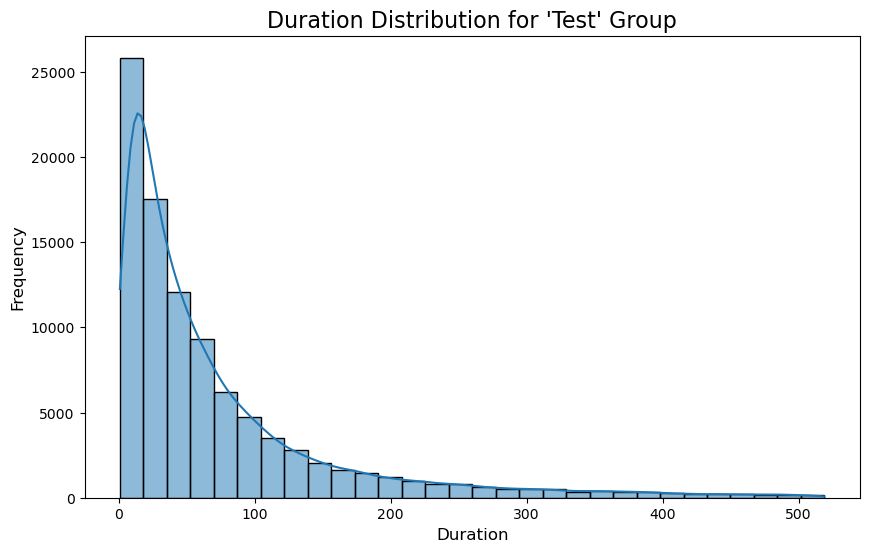

In [1980]:
# 1. Filter the DataFrame where Variation == 'Test'
durations_test = df_no_outliers[df_no_outliers["Variation"] == "Test"]["duration"]

# 2. Plot the distribution using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(durations_test, bins=30, kde=True)  # kde=True adds a Kernel Density Estimate curve

# 3. Set labels and title
plt.title("Duration Distribution for 'Test' Group", fontsize=16)
plt.xlabel("Duration", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# 4. Show the plot
plt.show()

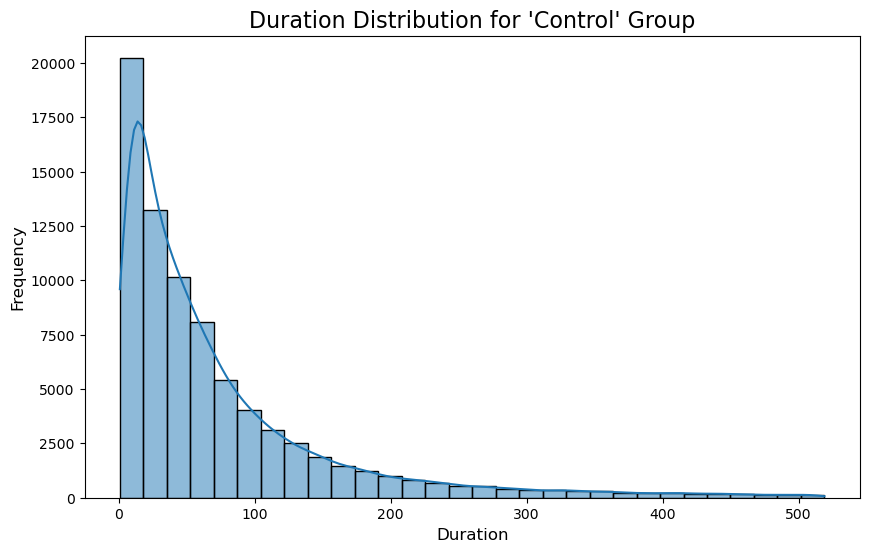

In [1982]:
# 1. Filter the DataFrame where Variation == 'Control'
durations_control = df_no_outliers[df_no_outliers["Variation"] == "Control"]["duration"]

# 2. Plot the distribution using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(durations_control, bins=30, kde=True)  # kde=True adds a Kernel Density Estimate curve

# 3. Set labels and title
plt.title("Duration Distribution for 'Control' Group", fontsize=16)
plt.xlabel("Duration", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# 4. Show the plot
plt.show()

### Filtering out the Outliers from the dataset

In [1856]:
df_duration[df_duration["Variation"] == "Control"]["duration"].value_counts().sort_values

<bound method Series.sort_values of duration
0.0       28655
7.0        1683
6.0        1677
8.0        1578
9.0        1549
          ...  
1321.0        1
2205.0        1
971.0         1
2514.0        1
2073.0        1
Name: count, Length: 1520, dtype: int64>

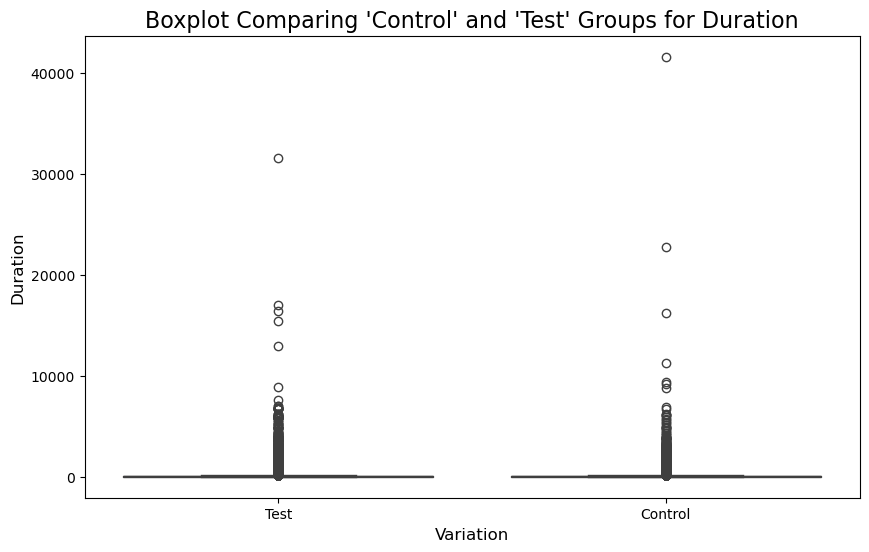

In [1846]:
# 1. Plot the boxplot comparing Control and Test groups
plt.figure(figsize=(10, 6))
sns.boxplot(x="Variation", y="duration", data=df_duration[df_duration["Variation"].isin(["Control", "Test"])])

# 2. Set labels and title
plt.title("Boxplot Comparing 'Control' and 'Test' Groups for Duration", fontsize=16)
plt.xlabel("Variation", fontsize=12)
plt.ylabel("Duration", fontsize=12)

# 3. Show the plot
plt.show()

In [1858]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [1860]:
tukeys_test_outliers(df_duration[df_duration["Variation"] == "Control"]["duration"])

13         284.0
100        454.0
101        230.0
159        315.0
174        199.0
           ...  
239250     228.0
239251     366.0
239274     263.0
239276    2073.0
239287     448.0
Name: duration, Length: 9387, dtype: float64

In [1978]:
Q1 = df_duration["duration"].quantile(0.25)
Q3 = df_duration["duration"].quantile(0.75)
IQR = Q3 - Q1
    
# Define bounds for the outliers
lower_bound = Q1 - 6 * IQR
upper_bound = Q3 + 6 * IQR

df_no_outliers = df_duration[(df_duration["duration"] >= lower_bound) & (df_duration["duration"] <= upper_bound)]

# Dropping Zero duration values as they don't contain any information

df_no_outliers = df_no_outliers[df_no_outliers["duration"] != 0]
df_no_outliers 

,client_id,Variation,visitor_id,visit_id,process_step,duration
1,555,Test,402506806_56087378777,637149525_38041617439_716659,start,7.0
2,555,Test,402506806_56087378777,637149525_38041617439_716659,step_1,32.0
3,555,Test,402506806_56087378777,637149525_38041617439_716659,step_2,99.0
4,555,Test,402506806_56087378777,637149525_38041617439_716659,step_3,20.0
6,647,Test,66758770_53988066587,40369564_40101682850_311847,start,7.0
...,...,...,...,...,...,...
239325,9999729,Test,834634258_21862004160,870243567_56915814033_814203,step_3,21.0
239326,9999729,Test,843385170_36953471821,493310979_9209676464_421146,start,82.0
239327,9999729,Test,843385170_36953471821,493310979_9209676464_421146,step_1,287.0
239328,9999729,Test,843385170_36953471821,493310979_9209676464_421146,step_2,81.0


In [1934]:
df_no_outliers.to_csv("df_duration_no_outliers.csv", index= True)

In [2068]:
#  Calculate average duration for each step
step_durations_test = round(df_no_outliers[df_no_outliers["Variation"] == "Test"].groupby('process_step')['duration'].agg([
    'count',
    'mean',
    'median',
    'std'
]),2)

step_durations_control = round(df_no_outliers[df_no_outliers["Variation"] == "Control"].groupby('process_step')['duration'].agg([
    'count',
    'mean',
    'median',
    'std'
]),2)

In [2069]:
df_no_outliers[(df_no_outliers['Variation'] == 'Test') & (df_no_outliers["process_step"] == "confirm")]["duration"].mean()


160.57276995305165

In [2070]:
step_durations_test

,count,mean,median,std
process_step,,,,
confirm,426,160.57,112.0,129.45
start,27763,37.95,13.0,66.30
step_1,25303,62.98,33.0,82.30
step_2,22969,98.14,74.0,79.78
step_3,19419,103.00,62.0,103.06


In [2076]:
step_durations_control

,count,mean,median,std
process_step,,,,
confirm,601,131.89,93.0,111.55
start,23066,39.97,21.0,60.35
step_1,20660,48.72,24.0,68.51
step_2,18474,104.90,80.0,83.90
step_3,15439,118.48,83.0,103.09


## Error Rates: If there’s a step where users go back to a previous step, it may indicate confusion or an error. You should consider moving from a later step to an earlier one as an error.

In [850]:
#-------Function/Code overview:---------#

# The function evaluates each visitor's sequence to check if it follows the specified order (start, step_1, step_2, step_3, confirm). 
# If the steps are out of order or include steps not in the expected sequence, the sequence is counted as an error.
# The function then calculates the error rate as the percentage of invalid sequences out of the total sequences.

### Calculating the errors made per client. Merged with demogrphic info table (Extra)

In [854]:
def calculate_error_count_client(df):
    """Calculates the error count per client based on the process_step sequence."""

    # Group by client_id
    grouped_data = df.groupby('client_id')

    # Initialize a list to store results
    result_data = []

    # Define the expected order
    expected_order = ['confirm','step_3','step_2','step_1','start']

    # Iterate through each group
    for client_id, group in grouped_data:
        actual_sequence = group['process_step'].tolist()

        # Initialize error count for this client
        error_count = 0
        current_index = 0

        # Check if the actual sequence follows the expected order
        for step in actual_sequence:
            step_index = expected_order.index(step)

            # If step appears before the current index in the expected order, it's an error
            if step_index < current_index:
                error_count += 1

            # Update the current index to the step's position in the expected order
            current_index = step_index

        # Append the result for this client
        result_data.append({"client_id": client_id, "error_count": error_count})

    # Convert the results to a DataFrame
    result_df = pd.DataFrame(result_data)

    return result_df

In [1702]:
calculate_error_count_client(df_web_data_cleaned)

df_merged_error_count = df_client_test_merged.merge(calculate_error_count_client(df_web_data_cleaned), how="inner", on="client_id")
df_merged_error_count


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,error_count
0,836976,6.0,73.0,60,U,2.0,45105.30,6.0,9.0,Test,0
1,2304905,7.0,94.0,58,U,2.0,110860.30,6.0,9.0,Control,0
2,1439522,5.0,64.0,32,U,2.0,52467.79,6.0,9.0,Test,0
3,1562045,16.0,198.0,49,M,2.0,67454.65,3.0,6.0,Test,0
4,5126305,12.0,145.0,33,F,2.0,103671.75,0.0,3.0,Control,0
...,...,...,...,...,...,...,...,...,...,...,...
50482,1780858,21.0,262.0,68,M,3.0,372100.59,6.0,9.0,Test,0
50483,6967120,21.0,260.0,68,M,3.0,4279873.38,6.0,9.0,Control,0
50484,5826160,20.0,249.0,56,F,2.0,44837.16,2.0,5.0,Test,1
50485,8739285,19.0,229.0,69,F,2.0,44994.24,1.0,4.0,Test,0


In [855]:
df_errors_control = calculate_error_count_client(df_control)
df_clients_control_error = df_clients_control.merge(df_errors_control, how="inner", on="client_id")
df_clients_control_error

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,error_count
0,2304905,7.0,94.0,58,U,2.0,110860.30,6.0,9.0,Control,0
1,5126305,12.0,145.0,33,F,2.0,103671.75,0.0,3.0,Control,0
2,3727881,5.0,71.0,30,U,2.0,23915.60,0.0,3.0,Control,1
3,272934,5.0,66.0,58,U,2.0,27021.42,2.0,5.0,Control,0
4,285619,30.0,369.0,67,M,2.0,299388.72,3.0,6.0,Control,2
...,...,...,...,...,...,...,...,...,...,...,...
23521,6662941,7.0,84.0,36,F,2.0,83101.84,4.0,7.0,Control,2
23522,2787512,23.0,283.0,48,F,3.0,123618.60,1.0,4.0,Control,0
23523,9932367,23.0,280.0,57,F,2.0,94466.55,6.0,9.0,Control,0
23524,4079649,23.0,276.0,62,M,3.0,57575.28,4.0,7.0,Control,0


In [1678]:
df_errors_test = calculate_error_count_client(df_test)
df_clients_test_error = df_clients_test.merge(df_errors_test, how="inner", on="client_id")
df_clients_test_error

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,error_count
0,836976,6.0,73.0,60,U,2.0,45105.30,6.0,9.0,Test,0
1,1439522,5.0,64.0,32,U,2.0,52467.79,6.0,9.0,Test,0
2,1562045,16.0,198.0,49,M,2.0,67454.65,3.0,6.0,Test,0
3,388801,30.0,361.0,57,M,5.0,522498.72,1.0,4.0,Test,0
4,8198645,15.0,189.0,54,F,2.0,382303.83,6.0,9.0,Test,0
...,...,...,...,...,...,...,...,...,...,...,...
26956,501496,23.0,281.0,35,F,2.0,32529.34,0.0,3.0,Test,0
26957,1780858,21.0,262.0,68,M,3.0,372100.59,6.0,9.0,Test,0
26958,5826160,20.0,249.0,56,F,2.0,44837.16,2.0,5.0,Test,1
26959,8739285,19.0,229.0,69,F,2.0,44994.24,1.0,4.0,Test,0


In [1684]:
df_merged_error_count = pd.concat([df_clients_test_error, df_clients_control_error])

In [1676]:
df_errors_test = calculate_error_count_client(df_test)
df_errors_test_per = df_errors_test["error_count"].value_counts().reset_index()
df_errors_test_per["percentage"] = round(df_errors_test_per["count"] / 26961*100,2)
df_errors_test


,client_id,error_count
0,555,0
1,647,0
2,934,0
3,1336,0
4,1346,2
...,...,...
26956,9999150,1
26957,9999400,0
26958,9999626,0
26959,9999729,2


In [857]:
df_clients_test_error = df_clients_test.merge(df_errors_test, how="inner", on="client_id")
df_clients_test_error

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,error_count
0,836976,6.0,73.0,60,U,2.0,45105.30,6.0,9.0,Test,0
1,1439522,5.0,64.0,32,U,2.0,52467.79,6.0,9.0,Test,0
2,1562045,16.0,198.0,49,M,2.0,67454.65,3.0,6.0,Test,0
3,388801,30.0,361.0,57,M,5.0,522498.72,1.0,4.0,Test,0
4,8198645,15.0,189.0,54,F,2.0,382303.83,6.0,9.0,Test,0
...,...,...,...,...,...,...,...,...,...,...,...
26956,501496,23.0,281.0,35,F,2.0,32529.34,0.0,3.0,Test,0
26957,1780858,21.0,262.0,68,M,3.0,372100.59,6.0,9.0,Test,0
26958,5826160,20.0,249.0,56,F,2.0,44837.16,2.0,5.0,Test,1
26959,8739285,19.0,229.0,69,F,2.0,44994.24,1.0,4.0,Test,0


In [859]:
df_errors_control = calculate_error_count_client(df_control)
df_errors_control_per = df_errors_control["error_count"].value_counts().reset_index()
df_errors_control_per["percentage"] = round(df_errors_control_per["count"] / 26961*100,2)

In [2166]:
# Calculate the error rate for whole group
error_rate = calculate_error_rate_client(df_web_data_merged)
print("Error Rate:", round(error_rate,2), "%")

Error Rate: 39.63 %


In [862]:
# Calculate the error rate for whole group
error_rate = calculate_error_rate_client_new(df_web_data_merged)
print("Error Rate:", round(error_rate,2), "%")

Error Rate: 70.72 %


In [863]:
# Calculate the error rate for test group
error_rate = calculate_error_rate_client(df_test)
print("Error Rate:", round(error_rate,2), "%")

Error Rate: 42.34 %


In [864]:
# Calculate the error rate for test group
error_rate = calculate_error_rate_client_new(df_test)
print("Error Rate:", round(error_rate,2), "%")

Error Rate: 80.56 %


In [865]:
# Calculate the error rate for control group
error_rate = calculate_error_rate_client(df_control)
print("Error Rate:", round(error_rate,2), "%")

Error Rate: 37.96 %


In [866]:
# Calculate the error rate for control group
error_rate = calculate_error_rate_client_new(df_control)
print("Error Rate:", round(error_rate,2), "%")

Error Rate: 63.24 %


Evaluate how the new design’s performance compare to the old one, given the chosen KPIs (completion rate, time spent on each step and error rates).

Completion rate:

The completion rate for the test group is higher (69% against 64%), thefore we consider the new interface superior. More people completeing the process is likely to improve revenue as more customers get signed up for services.  

# Hypothesis Testing

### Duration of Steps

In [ ]:
# H0: The step duration per visit of the test group and the control group are equal (no significant difference).
# H1: The step duration  per visit of the test group and the control group are different (significant difference exists).

In [ ]:
df_no_outliers

In [ ]:
alpha = 0.5

In [1984]:
## Testing for Average of full process duration

# Step 1: Separate the data into Test and Control groups
test_group_all = df_no_outliers[df_no_outliers['Variation'] == 'Test']['duration']
control_group_all = df_no_outliers[df_no_outliers['Variation'] == 'Control']['duration']

# Calculate means for each group
mean_test = df_no_outliers[df_no_outliers["Variation"] == "Test"]["duration"].mean()
mean_control = df_no_outliers[df_no_outliers["Variation"] == "Control"]["duration"].mean()

# Step 3: Perform a Two-Sample T-test
t_stat, p_value = stats.ttest_ind(test_group_all, control_group_all, equal_var=False, alternative='greater')

# Results
print(f"Mean (Test): {mean_test}, Mean (Control): {mean_control}")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

Mean (Test): 72.69451397580309, Mean (Control): 73.80708077709612
T-statistic: -2.6794631846655874, P-value: 0.9963126256733676


In [1986]:
## Testing for Average of full process duration (including the Outliers)

# Step 1: Separate the data into Test and Control groups
test_group_all = df_duration[df_duration['Variation'] == 'Test']['duration']
control_group_all = df_duration[df_duration['Variation'] == 'Control']['duration']

# Calculate means for each group
mean_test = df_duration[df_duration["Variation"] == "Test"]["duration"].mean()
mean_control = df_duration[df_duration["Variation"] == "Control"]["duration"].mean()

# Step 3: Perform a Two-Sample T-test
t_stat, p_value = stats.ttest_ind(test_group_all, control_group_all, equal_var=False, alternative='greater')

# Results
print(f"Mean (Test): {mean_test}, Mean (Control): {mean_control}")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

Mean (Test): 81.61009227175992, Mean (Control): 75.26539772102737
T-statistic: 6.069011493525845, P-value: 6.444765839060881e-10


In [2002]:
dfs = [
    (df_no_outliers[(df_no_outliers['Variation'] == 'Test') & (df_no_outliers["process_step"] == "start")]["duration"], 
     df_no_outliers[(df_no_outliers['Variation'] == 'Control') & (df_no_outliers["process_step"] == "start")]["duration"]),
    
    (df_no_outliers[(df_no_outliers['Variation'] == 'Test') & (df_no_outliers["process_step"] == "step_1")]["duration"], 
     df_no_outliers[(df_no_outliers['Variation'] == 'Control') & (df_no_outliers["process_step"] == "step_1")]["duration"]),
    
    (df_no_outliers[(df_no_outliers['Variation'] == 'Test') & (df_no_outliers["process_step"] == "step_2")]["duration"], 
     df_no_outliers[(df_no_outliers['Variation'] == 'Control') & (df_no_outliers["process_step"] == "step_2")]["duration"]),
    
    (df_no_outliers[(df_no_outliers['Variation'] == 'Test') & (df_no_outliers["process_step"] == "step_3")]["duration"], 
     df_no_outliers[(df_no_outliers['Variation'] == 'Control') & (df_no_outliers["process_step"] == "step_3")]["duration"]),
    
    (df_no_outliers[(df_no_outliers['Variation'] == 'Test') & (df_no_outliers["process_step"] == "confirm")]["duration"], 
     df_no_outliers[(df_no_outliers['Variation'] == 'Control') & (df_no_outliers["process_step"] == "confirm")]["duration"])
]

In [1992]:
from scipy import stats

def perform_t_tests(dfs_test):
    t_tests_results = []  # List to store the results
    
    for df_pair in dfs_test:
        # Extract the test and control groups
        test_group = df_pair[0]
        control_group = df_pair[1]

        # Calculate the means for test and control groups
        mean_test = test_group.mean()
        mean_control = control_group.mean()

        # Perform t-test (independent two-sample t-test with unequal variances)
        t_stat, p_value = stats.ttest_ind(test_group, control_group, equal_var=False, alternative='greater')

        # Store the p_value and the means in the specified format
        t_tests_results.append((p_value, ({'mean_test': mean_test}, {'mean_control': mean_control})))
    
    return t_tests_results

In [2026]:
t_tests_results = perform_t_tests(dfs)

# Display results
for result in t_tests_results:
    print(f"P-value: {result[0]}")
    print(f"{result[1][0]}")
    print(f"{result[1][1]}")
    print()
  

P-value: 0.9998355791734568
{'mean_test': 37.94557504592443}
{'mean_control': 39.96531691667389}

P-value: 2.5470643747553943e-91
{'mean_test': 62.98087183337944}
{'mean_control': 48.716166505324296}

P-value: 0.9999999999999999
{'mean_test': 98.1437589794941}
{'mean_control': 104.89742340586771}

P-value: 1.0
{'mean_test': 103.00190535043}
{'mean_control': 118.47982382278644}

P-value: 0.00011410824547254874
{'mean_test': 160.57276995305165}
{'mean_control': 131.88851913477538}



### Completion Rate: T-test

A T-test is used here to compare the average completion rates between the Test and Control groups. It helps determine if any difference in their means is statistically significant or just due to random chance. We use it because it's designed to compare the means of two independent groups to see if the variation is meaningful.


In [ ]:
# H0: The completion rates of the test group and the control group are equal (no significant difference).
# H1: The completion rates of the test group and the control group are different (significant difference exists).

In [2081]:
df_all

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,error_count,completed,distinct_visit_count
0,836976,6.0,73.0,60,U,2.0,45105.30,6.0,9.0,Test,0,1.0,2
1,2304905,7.0,94.0,58,U,2.0,110860.30,6.0,9.0,Control,0,1.0,1
2,1439522,5.0,64.0,32,U,2.0,52467.79,6.0,9.0,Test,0,0.0,2
3,1562045,16.0,198.0,49,M,2.0,67454.65,3.0,6.0,Test,0,0.0,1
4,5126305,12.0,145.0,33,F,2.0,103671.75,0.0,3.0,Control,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50545,1780858,21.0,262.0,68,M,3.0,372100.59,6.0,9.0,Test,0,1.0,2
50546,6967120,21.0,260.0,68,M,3.0,4279873.38,6.0,9.0,Control,0,1.0,1
50547,5826160,20.0,249.0,56,F,2.0,44837.16,2.0,5.0,Test,1,1.0,3
50548,8739285,19.0,229.0,69,F,2.0,44994.24,1.0,4.0,Test,0,1.0,1


In [2110]:
alpha = 0.05

# Separate the data into Test and Control groups
test_group = df_all[df_all['Variation'] == 'Test']['completed']
control_group = df_all[df_all['Variation'] == 'Control']['completed']

# Calculate means for each group
mean_test = test_group.mean()
mean_control = control_group.mean()

# Perform a Two-Sample T-test
t_stat, p_value = stats.ttest_ind(test_group, control_group, equal_var=False, alternative='greater')

# Results
print(f"Mean (Test): {mean_test}, Mean (Control): {mean_control}")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

Mean (Test): 0.6627041439840018, Mean (Control): 0.629804221344545
T-statistic: 7.716078501128386, P-value: 6.110500809522858e-15


In [2112]:
((mean_control - mean_test) * 100)

-3.2899922639456847

In [2114]:
mean_test * 100

66.27041439840018

In [2116]:
mean_control * 100

62.98042213445449

### Error Rate: T-test

In [ ]:
# H0: The error rates of the test group and the control group are equal (no significant difference).
# H1: The error rates of the test group and the control group are different (significant difference exists).

In [2104]:
alpha = 0.05

# Separate the data into Test and Control groups
test_group = df_all[df_all['Variation'] == 'Test']['error_count']
control_group = df_all[df_all['Variation'] == 'Control']['error_count']

# Calculate means for each group
mean_test = test_group.mean()
mean_control = control_group.mean()

# Perform a Two-Sample T-test
t_stat, p_value = stats.ttest_ind(test_group, control_group, equal_var=False, alternative='greater')

# Results
print(f"Mean (Test): {mean_test}, Mean (Control): {mean_control}")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

Mean (Test): 0.8087619894085842, Mean (Control): 0.6338387055675883
T-statistic: 15.82535093507559, P-value: 1.4276242221388896e-56


In [2106]:
((mean_control - mean_test) * 100)

-17.492328384099597

### Testing for correlation between nnumerical variables

In [2136]:
corr_matrix = df_all[["clnt_tenure_mnth", "clnt_age", "num_accts", "bal", "calls_6_mnth", "logons_6_mnth", "error_count", "completed"]].corr()

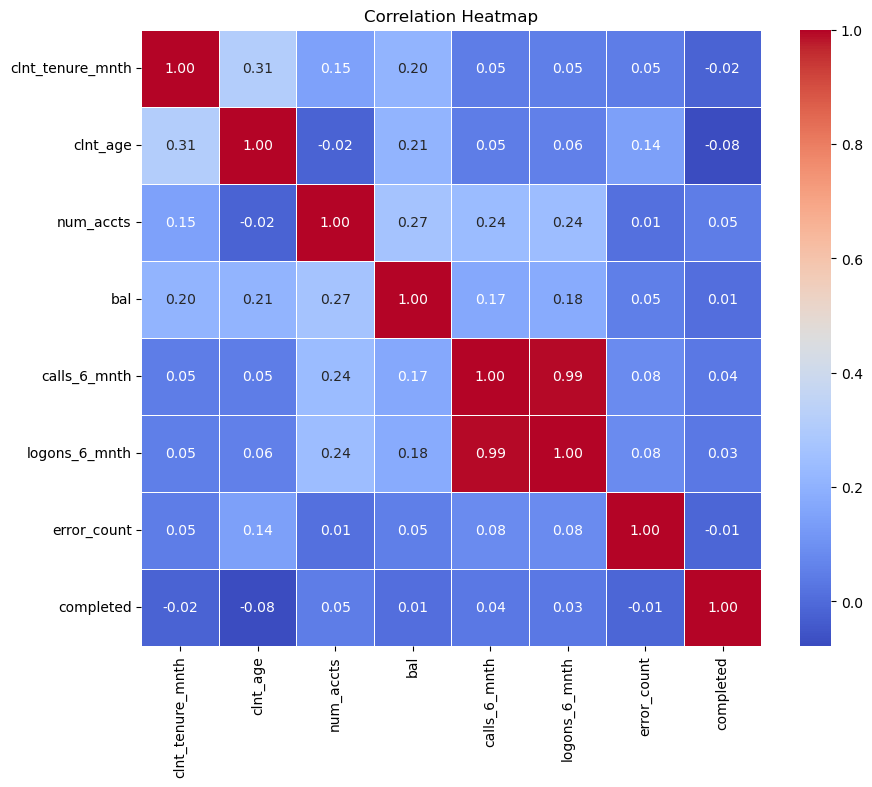

In [2138]:
plt.figure(figsize=(10, 8))  # Set the size of the plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()


# Experiment Evaluation (Day 5)

### Design Effectiveness

**1. Was the experiment well-structured?**

In [ ]:
# There is some concepts that should have been clarified by business:

# A. The 'Error rate' concept: The error rate has not being definied in the question it error rate per client ('client_id'), error per session 'visitor_id'?

    # Definition 1: The error rate is number of occurences where, within a visit (=visitor_id) from the client, the steps follow a specific sequence defined as follow: 
                    # ['start','step_1','step_2','step_3','confirm']. The error occurs if, a step is repeated, a step is skipped, the step does not follow the sequence. 
                    # The error does not occurs even if all steps are not presents.

    # Definition 2: The error rate is number of occurences where, for each client (=client_id'), the steps follow a specific sequence defined as follow: 
                    # ['start','step_1','step_2','step_3','confirm']. The error occurs if, a step is repeated, a step is skipped, the step does not follow the sequence. 
                    # The error does not occurs even if all steps are not presents.

# B. The 'Completion rate' concept: The completion rate is define by the 'confirm' step but is it completion rate per client ('client_id'), error per session 'visitor_id'?
    #a. Our Definition:

# This lack of clarity from business (in the project instructions in that case) is leading to asumption in the definition of 'Error rate' and 'completion rate'.

#the way the data is collected and could be ambigious

**2. Were clients randomly and equally divided between the old and new designs?**


In [275]:
# Test completion rate for test group

df_test[df_test["process_step"] == "confirm"]

df_test_confirm = df_test[df_test["process_step"] == "confirm"].groupby("client_id").agg({"process_step":"count"})
df_test_confirm.shape[0]

18682

In [279]:
# Test completion rate for control group

df_control[df_control["process_step"] == "confirm"]

df_control_confirm = df_control[df_control["process_step"] == "confirm"].groupby("client_id").agg({"process_step":"count"})
df_control_confirm.shape[0]

15428

In [285]:
df_test_confirm_dif = df_test_confirm.shape[0]-df_control_confirm.shape[0]
df_test_confirm_dif

3254

**3. Were there any biases?**

In [ ]:
# An intersting analysis would be to have a comparaison of the 2 groups (Test & Control) on the long-term. Sone Errors may be due to a lack of familiarity with the new UI which leads to an error count increase.
# Therefore conducting an analysis 1 year after the launch of the new UI could be a good idea especially since we are not far from the 5% threhold set by business.

### Duration Assessment

**Was the timeframe of the experiment (from 3/15/2017 to 6/20/2017) adequate to gather meaningful data and insights?**

### Additional Data Needs

**What other data, if available, could enhance the analysis?**

In [1706]:
combined_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visited_confirmed,distinct_visit_count,confirmation_per_visit
0,555,3.0,46.0,29,U,2.0,25454.66,2.0,6.0,Test,1.0,1,1.00
1,647,12.0,151.0,57,M,2.0,30525.80,0.0,4.0,Test,1.0,1,1.00
2,934,9.0,109.0,51,F,2.0,32522.88,0.0,3.0,Test,0.0,1,0.00
3,1028,12.0,145.0,36,M,3.0,103520.22,1.0,4.0,Control,0.0,1,0.00
4,1104,5.0,66.0,48,U,3.0,154643.94,6.0,9.0,Control,0.0,2,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50482,9999150,5.0,66.0,30,U,3.0,97141.71,6.0,9.0,Test,0.0,1,0.00
50483,9999400,7.0,86.0,28,U,2.0,51787.04,0.0,3.0,Test,1.0,1,1.00
50484,9999626,9.0,113.0,35,M,2.0,36642.88,6.0,9.0,Test,0.0,1,0.00
50485,9999729,10.0,124.0,31,F,3.0,107059.74,6.0,9.0,Test,1.0,3,0.33


In [1308]:
df_merged_error_count = pd.concat([df_clients_test_error, df_clients_control_error], ignore_index=True)


## Creation of summaried Data Frame

### Checking if customers completet the full process more than once


In [2147]:
df_all = pd.merge(
    df_merged_error_count,                                      # The main DataFrame (left)
    df_customer_completed[['client_id', 'completed']],  # The 'confirmed per visit' column to add
    on='client_id',                                 # Merging based on the 'client_id' column
    how='left'                                      # Keep all rows from df_visits (left DataFrame)
)

df_all = pd.merge(
    df_all,                                      # The main DataFrame (left)
    distinct_visit_counts[['client_id', 'distinct_visit_count']],  # The 'confirmed per visit' column to add
    on='client_id',                                 # Merging based on the 'client_id' column
    how='left'                                      # Keep all rows from df_visits (left DataFrame)
)

df_all["completed"] = df_all["completed"].fillna(0)

In [1747]:
df_visit_step_count = df_web_data_cleaned.groupby(["client_id", "Variation", "visit_id", "process_step"]).agg({"process_step": "count"}).groupby(["client_id", "Variation", "visit_id"]).agg({"process_step": "count"})
df_visit_step_count[df_visit_step_count["process_step"] >= 5]
df_visit_step_count[df_visit_step_count["process_step"] >= 5].groupby(["client_id", "Variation", "visit_id"]).agg({"process_step": "count"}).value_counts()

process_step
1               32736
Name: count, dtype: int64

In [1771]:
df_customer_completed = df_visit_step_count[df_visit_step_count["process_step"] >= 5]
df_customer_completed["completed"] = df_customer_completed["process_step"].replace(5,1)
df_customer_completed.drop(columns="process_step", inplace=True)
df_customer_completed.reset_index(inplace=True)

/var/folders/gk/c2gpqh3x7z74jf883m6p8r3c0000gn/T/ipykernel_874/333119688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer_completed["completed"] = df_customer_completed["process_step"].replace(5,1)
/var/folders/gk/c2gpqh3x7z74jf883m6p8r3c0000gn/T/ipykernel_874/333119688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer_completed.drop(columns="process_step", inplace=True)


# Data Export

In [ ]:
df_all.to_csv("df_all.csv", index= True)

In [ ]:
step_durations_test.to_csv("step_durations_test.csv", index= True)